In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

## Датасет с данными по безработным синим воротничкам с 1982 по 1991 годы

In [93]:
df = pd.read_csv(r"https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Benefits.csv")
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


In [95]:
df.shape

(4877, 19)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4877 non-null   int64  
 1   stateur   4877 non-null   float64
 2   statemb   4877 non-null   int64  
 3   state     4877 non-null   int64  
 4   age       4877 non-null   int64  
 5   tenure    4877 non-null   int64  
 6   joblost   4877 non-null   object 
 7   nwhite    4877 non-null   object 
 8   school12  4877 non-null   object 
 9   sex       4877 non-null   object 
 10  bluecol   4877 non-null   object 
 11  smsa      4877 non-null   object 
 12  married   4877 non-null   object 
 13  dkids     4877 non-null   object 
 14  dykids    4877 non-null   object 
 15  yrdispl   4877 non-null   int64  
 16  rr        4877 non-null   float64
 17  head      4877 non-null   object 
 18  ui        4877 non-null   object 
dtypes: float64(2), int64(6), object(11)
memory usage: 724.1+ KB


#### Проверка датасета на пропуски

In [100]:
df.isna().sum()

rownames    0
stateur     0
statemb     0
state       0
age         0
tenure      0
joblost     0
nwhite      0
school12    0
sex         0
bluecol     0
smsa        0
married     0
dkids       0
dykids      0
yrdispl     0
rr          0
head        0
ui          0
dtype: int64

Пропуски в датасете отсутствуют

### Предварительный анализ данных¶

#### определяю как распределяется количество уволенных по категориям

In [105]:
df['joblost'].unique()

array(['other', 'slack_work', 'position_abolished', 'seasonal_job_ended'],
      dtype=object)

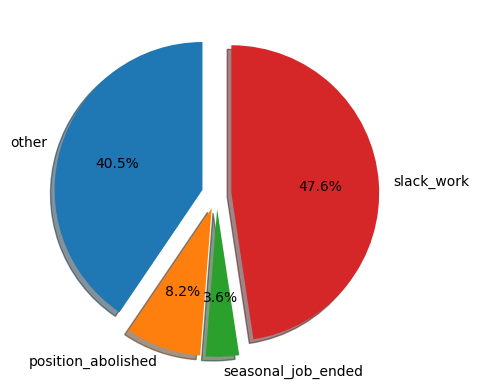

In [107]:
df_pie = df.groupby('joblost').agg({'joblost': 'count'})
df_pie.columns = ['s_count']
df_pie.reset_index
explode = (0.1, 0.1, 0.1, 0.1) 
fig, ax = plt.subplots()
ax.pie(df_pie['s_count'], labels = df_pie.index, explode=explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

по диаграмме видно, что большинство уволенных сотрудников представленных в датасете, находятся в множествах уволенных по "неудовлетворительной работе" и "прочим причинам", а незначительная часть в "по сокращению" и "сезонные работы"

### Как количественно распределялись увольнения по годам от 1982 по 1991

In [111]:
y_dict = {1: 1982, 2: 1983, 3: 1984, 4: 1985, 5: 1986, 6: 1987, 7: 1988, 8: 1989, 9: 1990, 10: 1991}
df['yrdispl'] = df['yrdispl'].map(y_dict)
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,1988,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,1991,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,1991,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,1991,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,1985,0.390625,yes,no


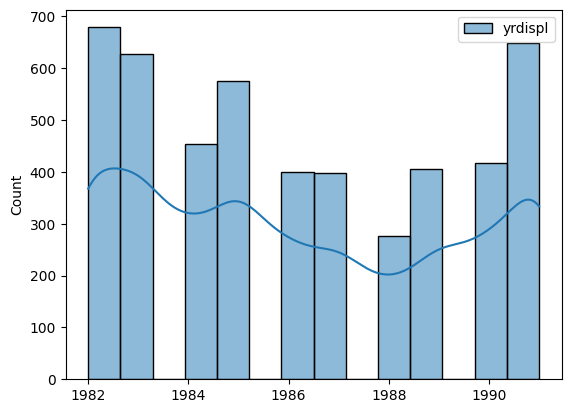

In [113]:
data = pd.DataFrame(df['yrdispl'])
sns.histplot(data, kde = True)
plt.show()

### Распределение уволенных сотрудников по возрастному параметру

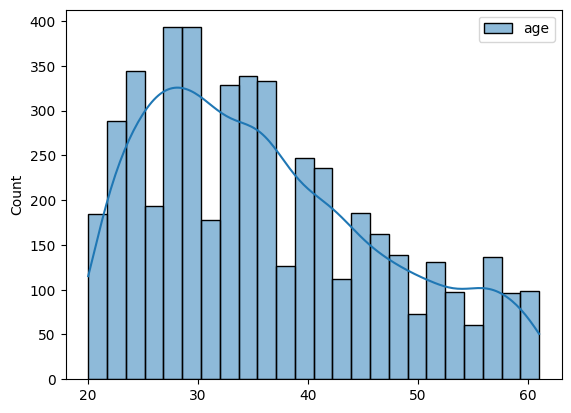

In [116]:
data = pd.DataFrame(df['age'])
sns.histplot(data, kde = True)
plt.show()

### Какое соотношение безработных "синих воротничков" получающих и не получающих пособие?

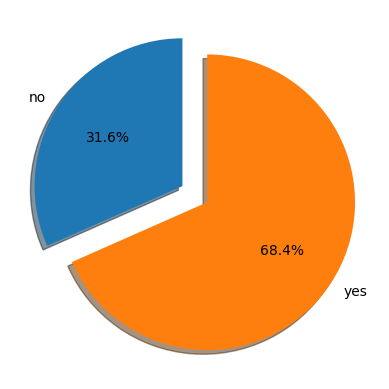

In [119]:
df_pie = df.groupby('ui').agg({'ui': 'count'})
df_pie.columns = ['s_count']
df_pie.reset_index
explode = (0.1, 0.1) 
fig, ax = plt.subplots()
ax.pie(df_pie['s_count'], labels = df_pie.index, explode = explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()

## Проверка гипотез

### 1) Выплаты по безработице должны быть тем выше, чем больше трудовой стаж сотрудника

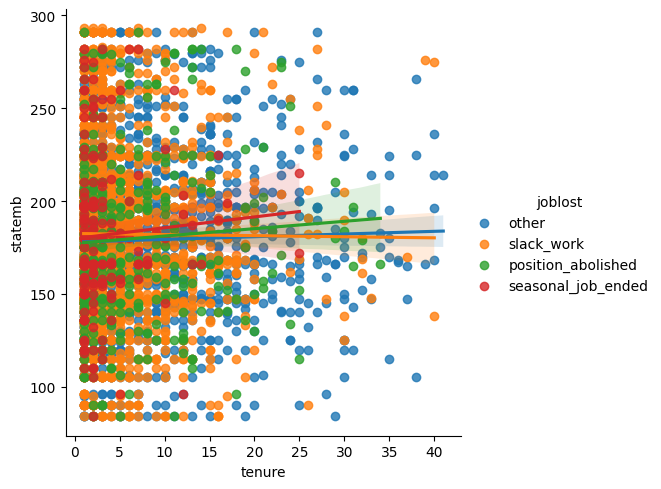

In [123]:
sns.lmplot(df, x='tenure', y = 'statemb', hue = 'joblost')
plt.show()

In [124]:
X = np.array(df['tenure'])
Y = np.array(df['statemb'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3145
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.575
Time:                        01:33:20   Log-Likelihood:                -25290.
No. Observations:                4877   AIC:                         5.058e+04
Df Residuals:                    4875   BIC:                         5.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.3470      0.834    216.259      0.0

##### по графику визуально заметно, что есть некая взаимосвязь между трудовым стажем и выплатами. При чем, выплаты оставшимся без работы по причине сокращения штатных единиц превышают выплаты уволенным по причине неудовлетворительной работы. Проведенный тест подтверждает что между переменными есть зависимость

### 2) Предполагаю, что безработица в штатах с более высоким значением выплат по безработице выше

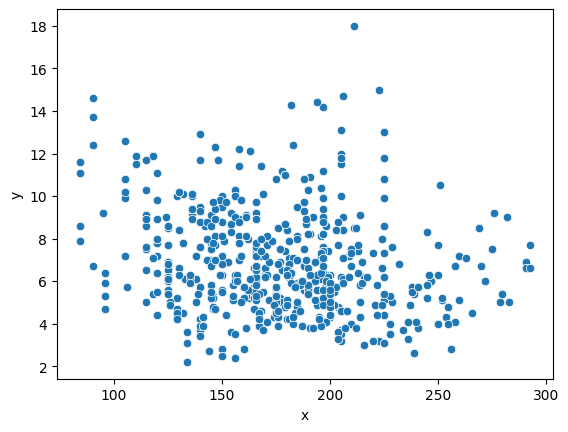

In [129]:
data_state = pd.DataFrame({"x": df['statemb'], "y": df['stateur']})
sns.scatterplot(data = data_state, x = 'x', y = 'y')
plt.show()

In [131]:
df['statemb'].corr(df['stateur'])

-0.24238552116605383

In [133]:
stats.spearmanr(df['statemb'], df['stateur'])

SignificanceResult(statistic=-0.24100529952327157, pvalue=2.136224801691929e-65)

#### По результатам тестов предполагаю, что переменные не имеют взаимосвязи или имеют столь малую взаимосвязь, что ею можно пренебречь, и гипотеза о взаимосвязи уровня безработицы в штате и размера выплаты не влияют друг на друга. И значит путем регулирования размера пособия невозможно воздействовать на уровень безработицы.

### 3) Предполагаю, что образование работника должно отражаться на размере выплат от штата 

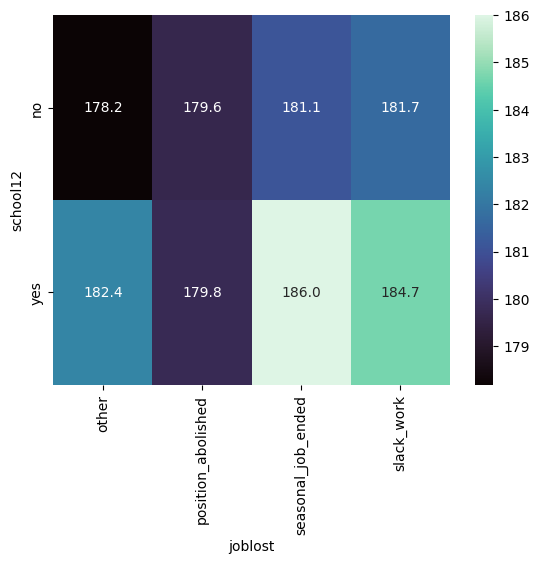

In [137]:
data_ed = df.groupby(['school12','joblost'])['statemb'].mean().unstack()
data_ed.head()
sns.heatmap(data_ed, annot = True, fmt='.1f', cmap="mako")
plt.show()

#### По распределению на тепловой карте заметно, что средний размер выплат выше у рабочих, имеющих образование выше школьного. Но при этом при увольнении по сокращению штата средня выплата у рабочих с разным уровнем образования близки по значению.  


### Тест распределения числовой переменной на соответствие нормальному

Протестирую распределение statemb на соответствие нормальному

In [142]:
nst = df['statemb']
stats.shapiro(nst)

ShapiroResult(statistic=0.9832032245857075, pvalue=1.2374499142910393e-23)

малое значение p-value в тесте Шапиро-Уилка не позволяет предположить что значение statemb имеет распределение сходное с нормальным

In [145]:
stats.kstest(nst, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=84, statistic_sign=-1)

тест Колмогорова-Смирнова также подтверждает это

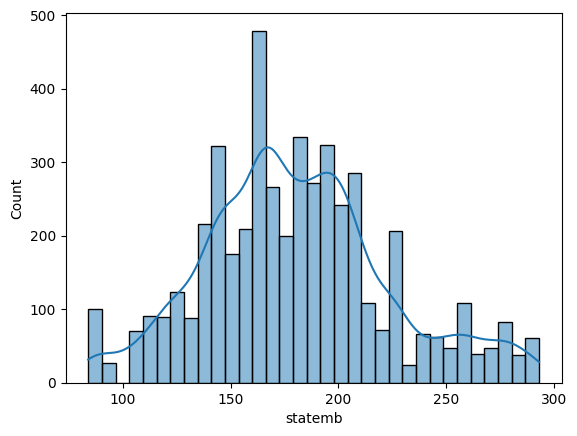

In [148]:
sns.histplot(nst, kde = True)
plt.show()

по гистограмме явно заметен левый "хвост"

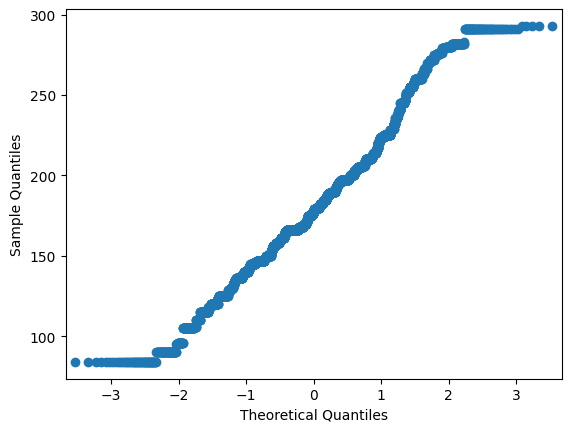

In [154]:
sm.qqplot(nst)
plt.show()